# Analiza 1000 družabnih iger z najvišjo oceno strani

### Začetne priprave
Uvozimo ustrezne knjižnice ter datoteko igre.csv, ki vsebuje podatke o igrah.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 10)

In [4]:
igre = pd.read_csv('igre.csv', index_col="rang")

V tabelo še dodamo en stolpec s podatkom o desetletju izida, ki nam bo pomagal pri analizi podatkov.

In [5]:
def izracunaj_desetletje(stevilo):
    return 10 * (stevilo // 10)

igre['desetletje'] = igre['leto'].apply(izracunaj_desetletje)

Poglejmo si kako zdaj zgleda tabela.

In [6]:
igre

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
1,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.413,8.59,47817,2010
2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.376,8.53,54112,2010
3,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.344,8.58,63054,2010
4,Ark Nova,2021,"Plan and build a modern, scientifically manage...",8.339,8.53,46130,2020
5,Twilight Imperium: Fourth Edition,2017,"Build an intergalactic empire through trade, r...",8.237,8.59,24501,2010
...,...,...,...,...,...,...,...
996,Signorie,2015,Use your ever-growing family to influence civi...,6.619,7.38,3172,2010
997,Daybreak,2023,Cooperatively decarbonize the planet and creat...,6.618,7.68,2384,2020
998,Tiny Epic Dinosaurs,2020,Become dino ranchers in the lucrative dinosaur...,6.618,7.32,3671,2020


Preverimo če je na seznamu tudi ena mojih najljubših družabnih iger _Carcassonne_.

In [7]:
igre[igre['ime'] == 'Carcassonne']

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
230,Carcassonne,2000,"Shape the medieval landscape of France, claimi...",7.296,7.41,128864,2000


## Najboljših 10
Za začetek si poglejmo najbolših deset iger iz različnih kategorij.

Deset iger z najboljšo oceno strani:

In [8]:
igre.head(10)

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
1,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.413,8.59,47817,2010
2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.376,8.53,54112,2010
3,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.344,8.58,63054,2010
4,Ark Nova,2021,"Plan and build a modern, scientifically manage...",8.339,8.53,46130,2020
5,Twilight Imperium: Fourth Edition,2017,"Build an intergalactic empire through trade, r...",8.237,8.59,24501,2010
6,Dune: Imperium,2020,"Influence, intrigue, and combat in the univers...",8.232,8.43,47709,2020
7,Terraforming Mars,2016,Compete with rival CEOs to make Mars habitable...,8.208,8.35,101245,2010
8,War of the Ring: Second Edition,2011,The Fellowship and the Free Peoples clash with...,8.189,8.54,21951,2010
9,Star Wars: Rebellion,2016,Strike from your hidden base as the Rebels—or ...,8.170,8.42,33105,2010


Deset iger z najboljšo povprečno oceno:

In [9]:
igre.sort_values('povprecna_ocena', ascending=False).head(10)

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
653,Aeon Trespass: Odyssey,2022,"Tame the Titans! Arm, evolve and pilot them to...",6.849,9.04,2277,2020
61,Oathsworn: Into the Deepwood,2022,Fight for humanity&#039;s survival against unn...,7.704,8.95,5140,2020
25,Frosthaven,2022,Adventure in the frozen north and build up you...,7.912,8.82,7443,2020
224,Slay the Spire: The Board Game,2024,"Craft a unique deck, discover powerful relics,...",7.301,8.80,3179,2020
36,Dune: Imperium – Uprising,2023,"Deploy agents, build your deck, and engage in ...",7.848,8.74,6721,2020
168,Ticket to Ride Legacy: Legends of the West,2023,Build train lines across the United States in ...,7.399,8.73,3230,2020
172,Too Many Bones: Undertow,2018,Songstress Stanza &amp; stealthy Duster board ...,7.396,8.69,3464,2010
84,Age of Innovation,2023,Terraform the world to expand your faction and...,7.610,8.65,4698,2020
282,Arkham Horror: The Card Game (Revised Edition),2021,Revised core set repackages the original with ...,7.217,8.64,2954,2020


Deset iger z največjim številom glasov:

In [10]:
igre.sort_values('stevilo_glasov', ascending=False).head(10)

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
559,CATAN,1995,Collect and trade resources to build up the is...,6.919,7.10,129796,1990
230,Carcassonne,2000,"Shape the medieval landscape of France, claimi...",7.296,7.41,128864,2000
151,Pandemic,2008,Your team of experts must prevent the world fr...,7.426,7.53,127043,2000
94,7 Wonders,2010,Draft cards to develop your ancient civilizati...,7.570,7.68,105871,2010
7,Terraforming Mars,2016,Compete with rival CEOs to make Mars habitable...,8.208,8.35,101245,2010
19,7 Wonders Duel,2015,Science? Military? What will you draft to win ...,7.971,8.09,96830,2010
29,Wingspan,2019,Attract a beautiful and diverse collection of ...,7.890,8.04,96156,2010
142,Codenames,2015,Give your team clever one-word clues to help t...,7.445,7.54,93782,2010
79,Azul,2017,Artfully embellish the walls of your palace by...,7.633,7.74,93100,2010


S tabel razberemo, da ne obstaja igra, ki bi bila na vseh treh seznamih v najboljših 10. Izpostavili bi lahko samo igro _Terraforming Mars_, ki je na seznamu iger z najvišjimi ocenami strani ter iger z največ glasovi. Ta igra je tudi edina, ki ima oceno strani ter povprečno oceno višjo od 8.00 med igrami z več kot 90000 glasov.

Poglejmo si opis igre, da vidimo razlog za popularnost igre.

In [11]:
igre[igre['ime'] == 'Terraforming Mars']['opis'].values[0]

'Compete with rival CEOs to make Mars habitable and build your corporate empire.'

Po opisu vidimo, da gre za fantazijsko-strateško igro. Ideja o kolonizaciji in preoblikovanju Marsa, da bi postal primeren za življenje, je fascinantna in aktualna tema, ki privlači ljudi, ki jih zanima znanost in vesolje. Igra vključuje tudi gradnjo imperija ter tekmovanje z drugimi igralci, kar dodatno povečuje njeno privlačnost. Prav zaradi te tematike in strateškega igranja je igra pridobila tolikšno popularnost.

## Analiza družabnih iger po desetletjih
V tem razdelku si podrobneje poglejmo igre v treh desetletjih:
- družabne igre med 1990-1999
- družabne igre med 2000-2009
- družabne igre med 2010-2019


### Družabne igre med 1990-1999
Poglejmo si družabne igre v tem desetletju, razvrščene glede na število glasov.

In [12]:
igre_90ta = igre[igre['desetletje'] == 1990]
igre_90ta = igre_90ta.sort_values(by='stevilo_glasov', ascending=False)
igre_90ta

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
559,CATAN,1995,Collect and trade resources to build up the is...,6.919,7.10,129796,1990
527,Bohnanza,1997,"Farm beans, harvest crops and trade your way t...",6.948,7.06,47430,1990
331,Lost Cities,1999,"Set out on expeditions, but will your findings...",7.139,7.24,47237,1990
166,Magic: The Gathering,1993,Cast spells and summon fantasy monsters in the...,7.401,7.58,40306,1990
335,For Sale,1997,What&#039;s your bid? Bid on promising propert...,7.134,7.26,31580,1990
...,...,...,...,...,...,...,...
927,ZÈRTZ,1999,Sacrifice pieces to your opponent in order to ...,6.663,7.26,4389,1990
980,Union Pacific,1999,Will you increase the value of railways you ha...,6.630,7.19,4355,1990
726,The Republic of Rome,1990,Politicians cooperate and compete over persona...,6.786,7.54,4223,1990


Primerjamo igri, ki sta na vrhu in dnu seznama.

In [13]:
igre.iloc[555]

ime                                                        Unsettled
leto                                                            2021
opis               A cooperative survival game in the bizarre and...
ocena_strani                                                   6.923
povprecna_ocena                                                 8.12
stevilo_glasov                                                  2795
desetletje                                                      2020
Name: 556, dtype: object

In [14]:
igre.iloc[633]

ime                                                     Draftosaurus
leto                                                            2019
opis               A dinosaur park will always attract tourists –...
ocena_strani                                                   6.863
povprecna_ocena                                                  7.1
stevilo_glasov                                                 14501
desetletje                                                      2010
Name: 634, dtype: object

Igra z največjim številom glasov je _CATAN_, igra z najmanj pa je _Roads & Boats_. Igra _Catan_ ima 129381 glasov, _Roads & Boats_ pa le 3432. Kljub temu ima prva nižjo povprečno oceno, kot druga. Menim, da je razlog tega v prepoznavnost igre. To pomeni, da je to igro preizkusilo bistveno več igralcev in med njimi tudi tisti, ki ne marajo takega žanra iger. Tako ima igra _Roads & Boats_ višjo povprečno oceno za kar 0,6. Vselej pa je spletna stran BoardGameGeek višjo oceno strani dodelila _CATANu_.

Poglejmo si še v kateri polovici devetdesetih so izšle bolj prepoznavne igre.

In [15]:
zgodnja_90ta = igre_90ta[igre_90ta['leto'] < 1995]
pozna_90ta = igre_90ta[igre_90ta['leto'] >= 1995]

stevilo_glasov_zgodnja = zgodnja_90ta['stevilo_glasov'].sum()
stevilo_glasov_pozna = pozna_90ta['stevilo_glasov'].sum()

print("Skupno število glasov za zgodnja 90-ta:", stevilo_glasov_zgodnja)
print("Skupno število glasov za pozna 90-ta:", stevilo_glasov_pozna)

Skupno število glasov za zgodnja 90-ta: 142572
Skupno število glasov za pozna 90-ta: 509315


Večje število glasov so dobile igre v poznih 90ih. Poglejmo si še koliko je povprečno število glasov v polovicah. 

In [16]:
povp_glasovi_zgodnja = stevilo_glasov_zgodnja / len(zgodnja_90ta)
povp_glasovi_pozna = stevilo_glasov_pozna / len(pozna_90ta)
print("Povprečno število glasov na igro v zgodnjih 90tih:", povp_glasovi_zgodnja)
print("Povprečno število glasov na igro v poznih 90tih:", povp_glasovi_pozna)

Povprečno število glasov na igro v zgodnjih 90tih: 20367.428571428572
Povprečno število glasov na igro v poznih 90tih: 20372.6


Po povprečni oceni pa vidimo, da je v vsaki skupini nekaj bolj glasovanih in manj glasovanih iger. Tako ne moramo reči, da so igre v katerem obdobju bolj priljubljene.

### Družabne igre med 2000-2009

Poglejmo si družabne igre iz tega desetletja. 

In [17]:
igre_00 = igre[igre['desetletje'] == 2000]
igre_00

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
13,Twilight Struggle,2005,Relive the Cold War and rewrite history in an ...,8.065,8.24,49311,2000
20,Brass: Lancashire,2007,Test your economic mettle as you build and net...,7.963,8.20,25304,2000
46,Puerto Rico,2002,"Ship goods, construct buildings, and choose ro...",7.772,7.91,71530,2000
54,Agricola,2007,Build your farmstead by sowing fields and rais...,7.744,7.87,73405,2000
65,Power Grid,2004,"Bid, network, and manage resources in a race t...",7.696,7.81,66063,2000
...,...,...,...,...,...,...,...
977,San Marco,2001,"Control Venice! You divide the cards, but anot...",6.631,7.17,4578,2000
978,Conflict of Heroes: Awakening the Bear! – Russ...,2008,Fast-paced tactical wargame of the Eastern Fro...,6.631,7.50,3068,2000
982,Napoleon's Triumph,2007,A tactical-level block wargame simulating the ...,6.629,8.00,1836,2000


Od teh iger preverimo v katerem letu jih je nastalo koliko. Izračunamo še povprečno oceno strani v letu.

In [18]:
seznam_po_letih = igre_00.groupby('leto').agg({
    'ocena_strani': 'mean',

}).sort_index()
seznam_po_letih['stevilo_iger'] = igre_00.groupby('leto').size()
seznam_po_letih


,ocena_strani,stevilo_iger
leto,,
2000,6.982143,7
2001,6.825000,4
2002,7.029000,7
2003,6.886429,7
2004,6.950652,23
2005,7.081056,18
2006,7.039333,15
2007,7.001400,25
2008,7.091800,15


Opazimo, da se povprečje ocen strani v posameznem letu ne razlikujejo veliko. Izračunamo še povprečno oceno strani za vse igre v tem desetletju.

In [19]:
povprecna_ocena_strani = igre_00['ocena_strani'].mean()
print(f'Povprečna ocena strani vseh iger v tem desetletju: {povprecna_ocena_strani:.2f}')

Povprečna ocena strani vseh iger v tem desetletju: 7.00


Za več kot 0.1 se od povprečja desetletja razlikujeta samo igre v letu 2001 in letu 2003. Tako je za posamezno leto v tem desetletju povprečna ocena strani skoraj enaka.

Pa preverimo če to drži tudi za povprečno oceno.

In [20]:
seznam_po_letih2 = igre_00.groupby('leto').agg({
    'povprecna_ocena': 'mean',

}).sort_index()
seznam_po_letih2['stevilo_iger'] = igre_00.groupby('leto').size()
seznam_po_letih2

,povprecna_ocena,stevilo_iger
leto,,
2000,7.224286,7
2001,7.247500,4
2002,7.478571,7
2003,7.205714,7
2004,7.423043,23
2005,7.490000,18
2006,7.418000,15
2007,7.379200,25
2008,7.463333,15


In [21]:
avg_povprecna_ocena = igre_00['povprecna_ocena'].mean()
print(f'Povprečje povprečnih ocen vseh iger v tem desetletju: {avg_povprecna_ocena:.2f}')

Povprečje povprečnih ocen vseh iger v tem desetletju: 7.40


Tudi tu se v katerem letu ocena bistveno ne razlikuje od povprečja.

Za konec pa primerjamo to še s povprečjem vseh iger.

In [22]:
avg_povprecna_ocena_vseh = igre['povprecna_ocena'].mean()
print(f'Povprečje povprečnih ocen vseh iger: {avg_povprecna_ocena_vseh:.2f}')
povprecna_ocena_strani_vseh = igre['ocena_strani'].mean()
print(f'Povprečna ocena strani vseh iger: {povprecna_ocena_strani_vseh:.2f}')

Povprečje povprečnih ocen vseh iger: 7.57
Povprečna ocena strani vseh iger: 7.06


Povprečna ocena strani se v tem desetletju bistveno ne razlikuje od povprečne ocene strani vseh iger. Podpovprečna pa je v tem desetletju povprečna ocena. 



### Družabne igre med 2010-2019
Za to desetletje si bomo pobližje ogledali igre z več kot 40000 glasovi. Združili bomo podatka o oceni strani in povprečni oceni ter tako ocenili katere so najboljše igre v tem desetletju.

In [23]:
igre_10 = igre[igre['desetletje'] == 2010]
igre_10 = igre_10[igre_10['stevilo_glasov'] > 40000]
igre_10

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje
rang,,,,,,,
1,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.413,8.59,47817,2010
2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.376,8.53,54112,2010
3,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.344,8.58,63054,2010
7,Terraforming Mars,2016,Compete with rival CEOs to make Mars habitable...,8.208,8.35,101245,2010
11,Spirit Island,2017,Island Spirits join forces using elemental pow...,8.145,8.34,53361,2010
...,...,...,...,...,...,...,...
435,King of Tokyo,2011,Prove your dominance by destroying Tokyo or by...,7.028,7.13,71566,2010
540,Hanabi,2010,Give hints to create sets of fireworks and try...,6.934,7.04,49103,2010
598,Sushi Go!,2013,"Pass the sushi around, but keep the best for y...",6.888,7.00,47867,2010


In [24]:
igre_10['skupna_ocena'] = igre_10['ocena_strani'] + igre_10['povprecna_ocena']
top_10_igre = igre_10.sort_values(by='skupna_ocena', ascending=False).head(10)
top_10_igre

,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje,skupna_ocena
rang,,,,,,,,
1,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.413,8.59,47817,2010,17.003
3,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.344,8.58,63054,2010,16.924
2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.376,8.53,54112,2010,16.906
7,Terraforming Mars,2016,Compete with rival CEOs to make Mars habitable...,8.208,8.35,101245,2010,16.558
11,Spirit Island,2017,Island Spirits join forces using elemental pow...,8.145,8.34,53361,2010,16.485
15,Great Western Trail,2016,Use strategic outposts and navigate danger as ...,8.019,8.19,41381,2010,16.209
16,The Castles of Burgundy,2011,"Plan, trade, and build your Burgundian estate ...",8.016,8.14,63344,2010,16.156
17,Scythe,2016,"Five factions vie for dominance in a war-torn,...",7.984,8.14,85026,2010,16.124
19,7 Wonders Duel,2015,Science? Military? What will you draft to win ...,7.971,8.09,96830,2010,16.061


Zdaj pa še vizualizirajmo dobljene podatke. Za vsako igro narišimo tri stolpce s skupno, povprečno in oceno strani.

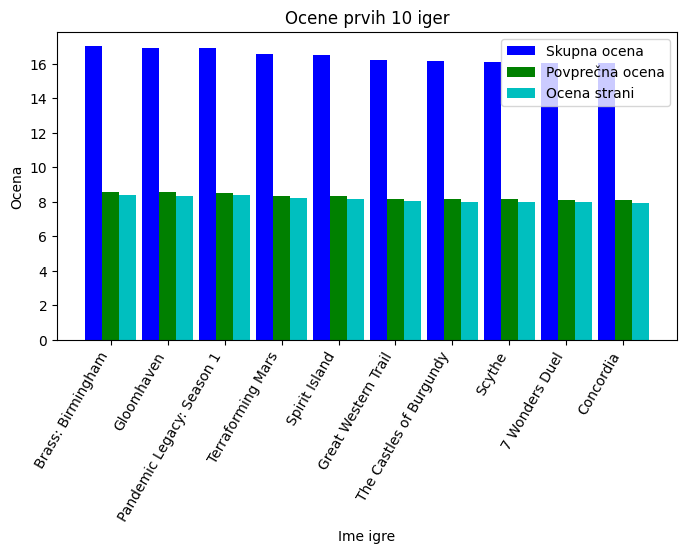

In [41]:
labels = top_10_igre['ime']
skupna_ocena = top_10_igre['skupna_ocena']
povprecna_ocena = top_10_igre['povprecna_ocena']
ocena_strani = top_10_igre['ocena_strani']

x = np.arange(len(labels))  # Ustvarimo pozicije za x-os
width = 0.3  # Širina stolpcev


plt.figure(figsize=(8, 4))
plt.bar(x - width, skupna_ocena, width, label='Skupna ocena', color='b')
plt.bar(x, povprecna_ocena, width, label='Povprečna ocena', color='g')
plt.bar(x + width, ocena_strani, width, label='Ocena strani', color='c')


plt.title('Ocene prvih 10 iger')
plt.xlabel('Ime igre')
plt.ylabel('Ocena')
plt.xticks(x, labels, rotation=60, ha='right')
plt.legend()

plt.show()


S skupkom povprečne ocene in ocene strani so tri najboljše igre tega desetletja _Brass: Birmingham_, _Gloomhaven_ ter _Pandemic Legacy: Season 1_.

## Hipoteze
V tem razdelku si bomo ogledali naslednje hipoteze:

- igre z več glasovi imajo višjo povprečno oceno,
- največ iger je izšlo v prejšnjem desetletju,
- igre izdane po letu 2010 imajo večjo povprečno oceno od ostalih,
- igre z višjo oceno strani imajo višjo povprečno oceno,
- igre z daljšimi opisi imajo več glasov kot igre s krajšimi opisi

ter preverili njihovo resničnost.

## Igre z več glasovi imajo višjo povprečno oceno.
Poglejmo si kako število glasov, ki jih je dobila igra vpliva na povprečno oceno. Oziroma lahko si pogledamo, če je med tema podatkoma sploh kakšna povezava. Podatke o igrah razvrstimo na 50 podskupin glede na število glasov pri igri. Tako bodo v podskupini 0 igre, katere so izmed vseh dobile najmanj glasov, v podskupini 49 pa te z največ glasovi.

In [26]:
igre_1 = igre.copy()
igre_1['glasovi_na_50_delov'] = pd.qcut(igre_1['stevilo_glasov'], 50, labels=False)
povprecja_po_delih = igre_1.groupby('glasovi_na_50_delov', observed=True)['povprecna_ocena'].mean()
igre_1['Povprecna_ocena_po_delih'] = igre_1['glasovi_na_50_delov'].map(povprecja_po_delih)
igre_1


,ime,leto,opis,ocena_strani,povprecna_ocena,stevilo_glasov,desetletje,glasovi_na_50_delov,Povprecna_ocena_po_delih
rang,,,,,,,,,
1,Brass: Birmingham,2018,"Build networks, grow industries, and navigate ...",8.413,8.59,47817,2010,47,7.648500
2,Pandemic Legacy: Season 1,2015,Mutating diseases are spreading around the wor...,8.376,8.53,54112,2010,48,7.772500
3,Gloomhaven,2017,Vanquish monsters with strategic cardplay. Ful...,8.344,8.58,63054,2010,48,7.772500
4,Ark Nova,2021,"Plan and build a modern, scientifically manage...",8.339,8.53,46130,2020,47,7.648500
5,Twilight Imperium: Fourth Edition,2017,"Build an intergalactic empire through trade, r...",8.237,8.59,24501,2010,43,7.590500
...,...,...,...,...,...,...,...,...,...
996,Signorie,2015,Use your ever-growing family to influence civi...,6.619,7.38,3172,2010,4,7.775000
997,Daybreak,2023,Cooperatively decarbonize the planet and creat...,6.618,7.68,2384,2020,1,8.066500
998,Tiny Epic Dinosaurs,2020,Become dino ranchers in the lucrative dinosaur...,6.618,7.32,3671,2020,6,7.571053


Da si dobljene rezultate lažje predstavljamo, iz njih naredimo graf o povprečni oceni za posamezno podskupino.

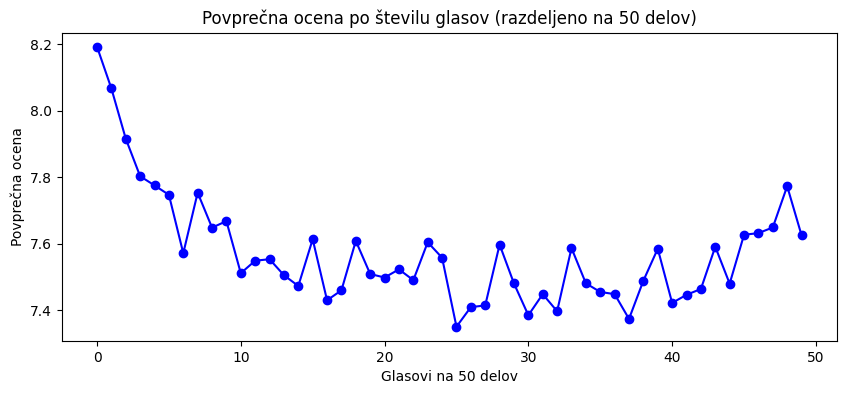

In [43]:


plt.figure(figsize=(10, 4))
plt.plot(povprecja_po_delih.index, povprecja_po_delih.values, marker='o', linestyle='-', color='b')
plt.xlabel('Glasovi na 50 delov')
plt.ylabel('Povprečna ocena')
plt.title('Povprečna ocena po številu glasov (razdeljeno na 50 delov)')
plt.show()


S prikazanim grafom je jasno, da z večjim številom glasov ne narašča tudi povprečna ocena igre. Najvišjo povprečno oceno imajo igre, ki so v skupini iger z najmanj glasovi, zato to hipotezo OVRŽEMO.

Poglejmo če pa hipoteza velja za igre, ki imajo npr. več kot 70000 glasov.

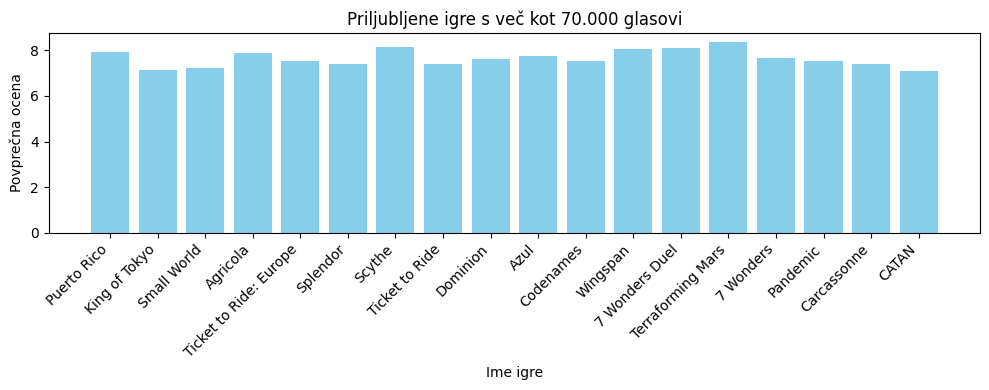

In [44]:
popularne_igre = igre[igre['stevilo_glasov'] > 70000]
popularne_igre = popularne_igre.sort_values(by='stevilo_glasov', ascending=True)


plt.figure(figsize=(10, 4))
plt.bar(popularne_igre['ime'], popularne_igre['povprecna_ocena'], color='skyblue')
plt.title('Priljubljene igre s več kot 70.000 glasovi')
plt.xlabel('Ime igre')
plt.ylabel('Povprečna ocena')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Kljub optimističnim napovedim vidimo, da tudi ta hipoteza ne drži.

### Največ iger izmed je izšlo v prejšnjem desetletju.
Hipoteza trdi, da je na seznamu iger največ tistih, ki so nastale med letom 2010 in 2019. Za analizo te hipoteze najprej preštejemo koliko iger je nastalo v katerem desetletju.

In [28]:
st_iger_po_desetletjih = igre['desetletje'].value_counts().sort_index()
st_iger_po_desetletjih

desetletje
-2200      1
 1470      1
 1630      1
 1800      1
 1850      1
        ... 
 1980     11
 1990     32
 2000    152
 2010    572
 2020    223
Name: count, Length: 14, dtype: int64

Vidimo, da naša hipoteza velja. Podatke še lahko vizualiziramo, da bomo imeli boljšo predstavo kolikšen del iger pripada kateremu desetletju.

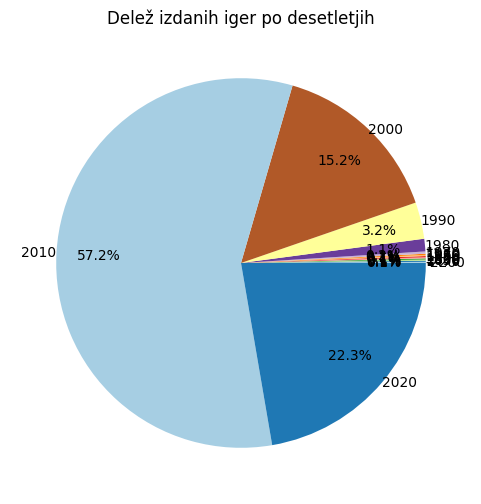

In [45]:
plt.figure(figsize=(6, 6))
plt.pie(st_iger_po_desetletjih,
        labels=st_iger_po_desetletjih.index,
        autopct='%1.1f%%',
        colors=plt.cm.Paired.colors,
        pctdistance=0.77,
        labeldistance=1.00
        )
plt.title('Delež izdanih iger po desetletjih')
plt.show()

V prejšnjem desetletju je nastalo več kot 50% iger izmed 1000 najbolje ocenjenih. Torej lahko hipotezo POTRDIMO.

### Igre izdane po letu 2010 imajo večjo povprečno oceno od ostalih.

Najprej bomo igre razvrstili med igre pred letom 2010 ter igre po letu 2010. Za vsako skupino bomo izračunali še povprečno oceno.

In [30]:
pred_2010 = igre[igre['leto'] <= 2010]
po_2010 = igre[igre['leto'] > 2010]


povp_pred_2010 = pred_2010['povprecna_ocena'].mean()
povp_po_2010 = po_2010['povprecna_ocena'].mean()

print(f"Povprečna ocena pred in leta 2010: {povp_pred_2010}")
print(f"Povprečna ocena po 2010: {povp_po_2010}")



Povprečna ocena pred in leta 2010: 7.398961038961039
Povprečna ocena po 2010: 7.6246814044213265


Podatke še vizualizirajmo. Igre najprej razvrstimo po letih kronološko, nato pa po povprečni oceni naraščujoče. Za vsako igro naredimo piko (pred in leta 2010 bo pika modra, po letu 2010 pa vijolična). Povprečni oceni pa bomo nakazali s črtkanima črtama.

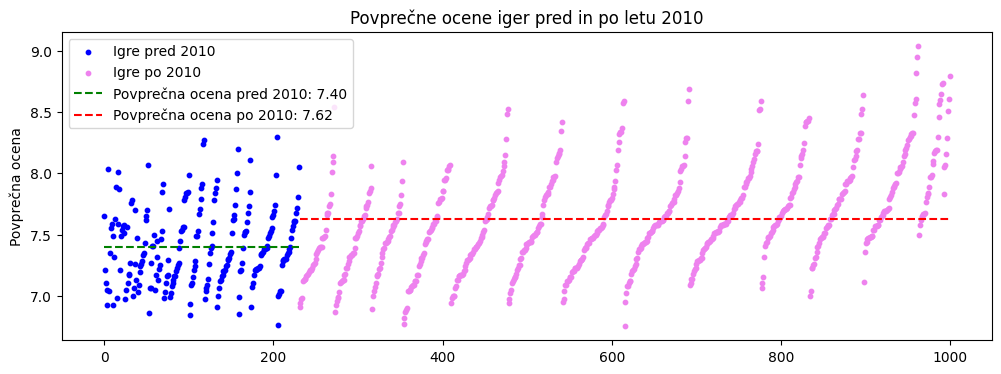

In [46]:
igre_2 = igre.sort_values(by=['leto', 'povprecna_ocena'], ascending=[True, True])


pred_2010 = igre_2[igre_2['leto'] <= 2010]
po_2010 = igre_2[igre_2['leto'] > 2010]


x_pred_2010 = range(0, len(pred_2010))  
x_po_2010 = range(len(pred_2010), len(pred_2010) + len(po_2010))  


plt.figure(figsize=(12, 4))
plt.scatter(x_pred_2010, pred_2010['povprecna_ocena'], color='blue', label='Igre pred 2010', s=10)


plt.scatter(x_po_2010, po_2010['povprecna_ocena'], color='violet', label='Igre po 2010', s=10)


povp_pred_2010 = pred_2010['povprecna_ocena'].mean()
povp_po_2010 = po_2010['povprecna_ocena'].mean()


plt.hlines(povp_pred_2010, xmin=0, xmax=len(pred_2010)-1, color='green', linestyle='--', label=f'Povprečna ocena pred 2010: {povp_pred_2010:.2f}')
plt.hlines(povp_po_2010, xmin=len(pred_2010), xmax=len(pred_2010) + len(po_2010)-1, color='red', linestyle='--', label=f'Povprečna ocena po 2010: {povp_po_2010:.2f}')


plt.ylabel('Povprečna ocena')
plt.title('Povprečne ocene iger pred in po letu 2010')


plt.legend()

plt.show()


To hipotezo lahko POTRDIMO. Opazimo tudi, da se z letom naraščujoče pike vedno bolj premikajo navzgor. To pomeni, da nastajajo vedno boljše igre, ki so priljubljene med igralci.

## Igre z višjo oceno strani imajo višjo povprečno oceno.

Poglejmo si resničnost te trditve. Igre bomo razvrstili v 30 skupin, posebej narisali dva grafa ter ju primerjali.

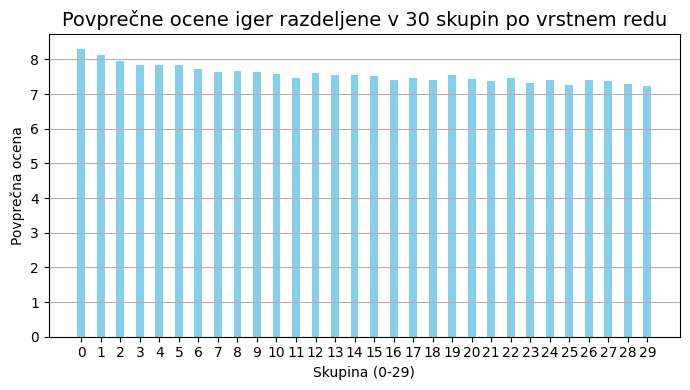

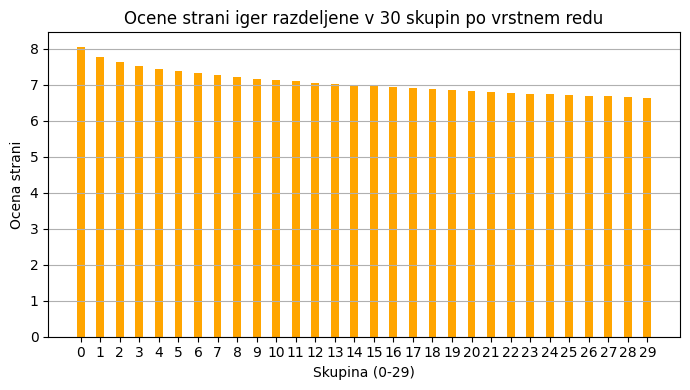

In [48]:
igre_3 = igre.copy()
igre_3['skupina'] = pd.cut(igre.index, bins=30, labels=False)

skupine_avg = igre_3.groupby('skupina').agg({'povprecna_ocena': 'mean', 'ocena_strani': 'mean'}).reset_index()


plt.figure(figsize=(7, 4))
plt.bar(skupine_avg['skupina'], skupine_avg['povprecna_ocena'], width=0.4, color='skyblue')
plt.xlabel('Skupina (0-29)')
plt.ylabel('Povprečna ocena')
plt.title('Povprečne ocene iger razdeljene v 30 skupin po vrstnem redu', fontsize=14)
plt.xticks(skupine_avg['skupina'])  
plt.grid(axis='y')  
plt.tight_layout()
plt.show()


plt.figure(figsize=(7, 4))
plt.bar(skupine_avg['skupina'], skupine_avg['ocena_strani'], width=0.4, color='orange')
plt.xlabel('Skupina (0-29)')
plt.ylabel('Ocena strani')
plt.title('Ocene strani iger razdeljene v 30 skupin po vrstnem redu')
plt.xticks(skupine_avg['skupina'])  
plt.grid(axis='y')  
plt.tight_layout()
plt.show()

Z vizualno predstavo lahko hipotezo POTRDIMO. Oba grafa imata podobno obliko. Stolpci v spodnjem grafu so strogo padajoči, saj so skupine razdeljene padajoče glede na oceno strani. V začetku ima zgornji graf dokaj podobno obliko, vendar od polovice naprej pride do odstopanj. Torej igre, ki so na strani najbolje ocenjene imajo tudi najboljšo povprečno oceno. Pri igrah, ki so dobile malce slabšo oceno strani, pa se zgodi, da je med igralci bolje priljubljena.

### Igre z daljšimi opisi imajo več glasov kot igre s krajšimi opisi.

Poglejmo si če ta trditev drži, torej če dolžina opisa vpliva na število glasov, ki jih ta igra prejme. Razdelili jih bomo po skupinah za lažjo analizo (glede na glasove) in v vsaki skupini izračunali povprečno dolžino opisa. Na koncu pa bomo podatke še narisali za lažjo predstavo.

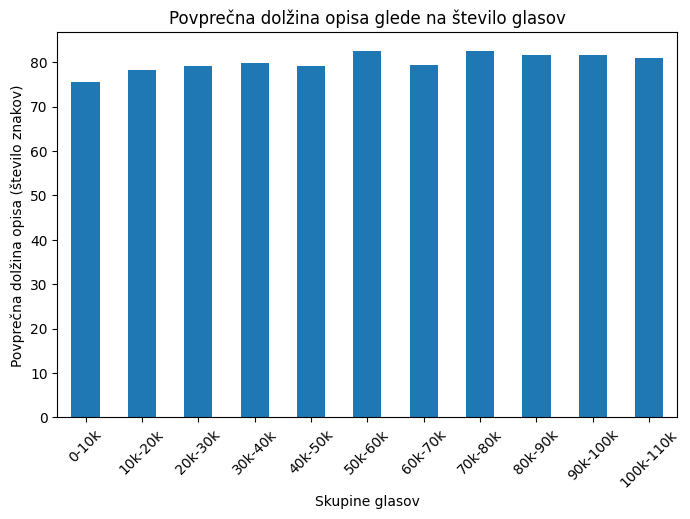

In [49]:
igre_4 = igre.copy()
igre_4['dolzina_opisa'] = igre_4['opis'].apply(len)

# Ustvari skupine glede na število glasov v razponih po 10.000
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k-110k']
igre_4['glasovi_skupine'] = pd.cut(igre['stevilo_glasov'], bins=bins, labels=labels, include_lowest=True)


povprecna_dolzina_opisa = igre_4.groupby('glasovi_skupine', observed=False)['dolzina_opisa'].mean()

plt.figure(figsize=(8, 5))
povprecna_dolzina_opisa.plot(kind='bar')
plt.title('Povprečna dolžina opisa glede na število glasov')
plt.xlabel('Skupine glasov')
plt.ylabel('Povprečna dolžina opisa (število znakov)')
plt.xticks(rotation=45)
plt.show()

Z vizualizacijo podatkov vidimo, da število znakov v opisu rahlo narašča z večjim številom glasov. A vsi opisi se razlikujejo za manj kot 10 znakov. S tem lahko sklepamo, da je na spletni strani BoardGameGeek omejena dolžina opisa za igro. Tako dolžina opisa družabne igre ne  mora vplivati na zanimanje uporabnikov te spletne strani, zato lahko to hipotezo OVRŽEMO. 